In [9]:
import h5py
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import math 
import os 
import json
import matplotlib.patches as patches 
from PIL import Image 

In [2]:
name = '1BYIA'
position = 136

In [3]:
with open('../data/full_seq_dict.json', "r") as json_file:
    seq_dict = json.load(json_file)

In [4]:
results_path = '../data/single_seg_w_bos_eos.hdf5'

In [5]:
with h5py.File(results_path, 'r') as f:
    ori_contact_full = np.array(f[name][str(position)]['0']['ori_contact_full'])

In [6]:
len(seq_dict[name])

224

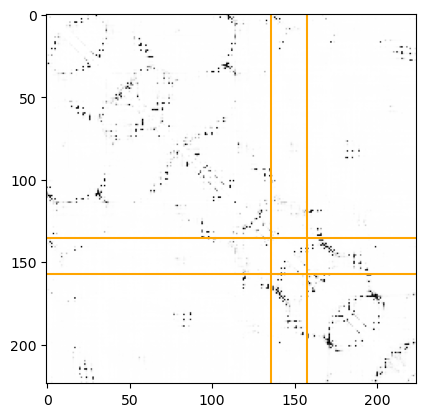

In [7]:
plt.imshow(ori_contact_full,cmap="Greys",vmin=0,vmax=1)
plt.axhline(position - 0.5, color='orange')
plt.axhline(position + 22 - 0.5, color='orange')

plt.axvline(position - 0.5, color='orange')
plt.axvline(position + 22 - 0.5, color='orange')

plt.xticks(np.arange(0, ori_contact_full.shape[1], 50))
plt.yticks(np.arange(0, ori_contact_full.shape[0], 50))

#plt.savefig('figures_manuscript/' + name + '_esm2contact_ori.svg')

plt.show()

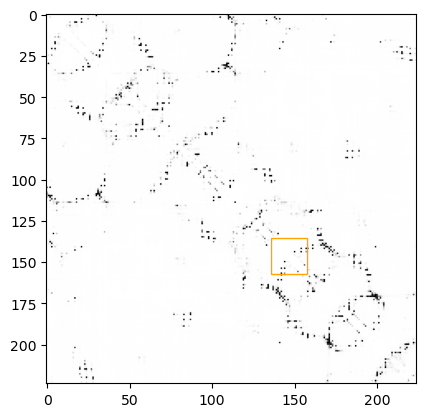

In [12]:
fig, ax = plt.subplots()
ax.imshow(ori_contact_full,cmap="Greys",vmin=0,vmax=1)
#plt.xlim(100, 200) 
#plt.ylim(100, 200)


rect1 = patches.Rectangle((position-0.5, position-0.5), 22, 22, linewidth=1, 
                         edgecolor='orange', facecolor="none") 

# Add the patch to the Axes 
ax.add_patch(rect1) 
plt.show() 

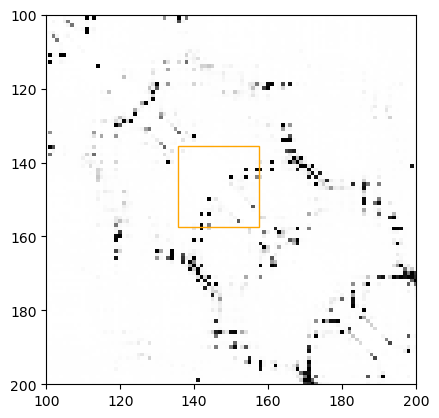

In [22]:
fig, ax = plt.subplots()
ax.imshow(ori_contact_full,cmap="Greys",vmin=0,vmax=1)
plt.xlim(100, 200) 
plt.ylim(200, 100)


rect1 = patches.Rectangle((position-0.5, position-0.5), 22, 22, linewidth=1, 
                         edgecolor='orange', facecolor="none") 

# Add the patch to the Axes 
ax.add_patch(rect1) 
plt.savefig('../figures_manuscript/1BYI_esm2contact_crop.svg')
plt.show() 

In [14]:
print(ori_contact_full.shape[0])

224


In [24]:
flank_len = '10'
with h5py.File(results_path, 'r') as f:
    mask_contact_full = np.array(f[name][str(position)][flank_len]['mask_contact_full'])

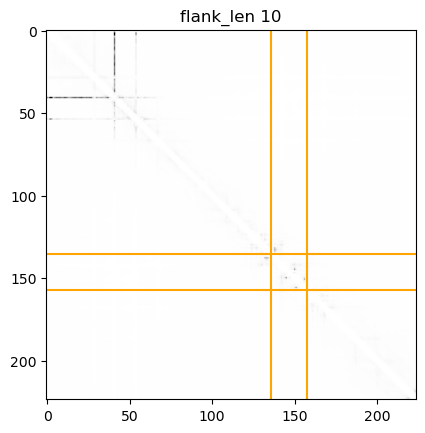

In [25]:
plt.imshow(mask_contact_full,cmap="Greys",vmin=0,vmax=1)

plt.axhline(position - 0.5, color='orange')
plt.axhline(position + 22 - 0.5, color='orange')

plt.axvline(position - 0.5, color='orange')
plt.axvline(position + 22 - 0.5, color='orange')

plt.xticks(np.arange(0, mask_contact_full.shape[1], 50))
plt.yticks(np.arange(0, mask_contact_full.shape[0], 50))

plt.title('flank_len ' + flank_len)
#plt.savefig('figures_manuscript/' + name + '_esm2contact_fl' + flank_len + '.svg')
plt.show()

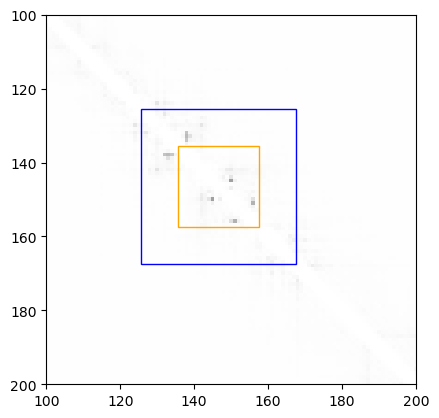

In [26]:
fig, ax = plt.subplots()
plt.imshow(mask_contact_full,cmap="Greys",vmin=0,vmax=1)

rect1 = patches.Rectangle((position - 0.5 - int(flank_len), position - 0.5 - int(flank_len)), 22 + 2 * int(flank_len), 22 + 2 * int(flank_len), linewidth=1, 
                         edgecolor='blue', facecolor="none") 
rect2 = patches.Rectangle((position-0.5, position-0.5), 22, 22, linewidth=1, 
                         edgecolor='orange', facecolor="none") 

plt.xlim(100, 200) 
plt.ylim(200, 100)

# Add the patch to the Axes 
ax.add_patch(rect1) 
ax.add_patch(rect2) 
plt.savefig('../figures_manuscript/1BYI_esm2contact_fl' + flank_len + '_crop.svg')
plt.show()